# Topic: Machine Learning in Breast Cancer Diagnostic Dataset


### The primary objective of this project is to leverage the WDBC dataset to determine whether certain features hold greater significance than others in the diagnosis of tumor malignancy. 

Wisconsin Diagnostic Breast Cancer (WDBC) Data: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display
import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score, precision_score

%matplotlib inline


In [2]:
ls

Breast Cancer Wisconsin (Diagnostic) - UCI Machine Learning Repository.pdf
Task3.pdf
WDBC_ML_Project.ipynb
wdbc_data/


In [3]:
ls wdbc_data/

wdbc.data*  wdbc.names*


In [4]:
cat wdbc_data/wdbc.names

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

**Attribute information**

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Several of the papers listed above contain detailed descriptions of
how these features are computed. 

**The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.**

All feature values are recoded with four significant digits.

In [5]:
columns_name = ["ID","Diagnosis","radius-M","texture-M","perimeter-M","area-M",
                "smoothness-M","compactness-M","concavity-M","concave_points-M","symmetry-M","fractal_dimension-M",
                "radius-SE","texture-SE","perimeter-SE","area-SE",
                "smoothness-SE","compactness-SE","concavity-SE","concave_points-SE","symmetry-SE","fractal_dimension-SE",
               "radius-W","texture-W","perimeter-W","area-W",
                "smoothness-W","compactness-W","concavity-W","concave_points-W","symmetry-W","fractal_dimension-W",]

In [6]:
wdbc_df = pd.read_table('wdbc_data/wdbc.data',
                          sep=',', names = columns_name)

In [7]:
wdbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    569 non-null    int64  
 1   Diagnosis             569 non-null    object 
 2   radius-M              569 non-null    float64
 3   texture-M             569 non-null    float64
 4   perimeter-M           569 non-null    float64
 5   area-M                569 non-null    float64
 6   smoothness-M          569 non-null    float64
 7   compactness-M         569 non-null    float64
 8   concavity-M           569 non-null    float64
 9   concave_points-M      569 non-null    float64
 10  symmetry-M            569 non-null    float64
 11  fractal_dimension-M   569 non-null    float64
 12  radius-SE             569 non-null    float64
 13  texture-SE            569 non-null    float64
 14  perimeter-SE          569 non-null    float64
 15  area-SE               5

In [8]:
wdbc_df.head()

,ID,Diagnosis,radius-M,texture-M,perimeter-M,area-M,smoothness-M,compactness-M,concavity-M,concave_points-M,...,radius-W,texture-W,perimeter-W,area-W,smoothness-W,compactness-W,concavity-W,concave_points-W,symmetry-W,fractal_dimension-W
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
wdbc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius-M,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture-M,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter-M,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area-M,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness-M,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness-M,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity-M,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points-M,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry-M,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [10]:
wdbc_df.isnull().values.any() 

False

In [11]:
wdbc_df.shape

(569, 32)

In [12]:
malignant = (wdbc_df["Diagnosis"] == "M").sum()
malignant

212

In [13]:
benign = (wdbc_df["Diagnosis"] == "B").sum()
benign

357

## Look at the proportion of benign and malignant tumors with a pie chart

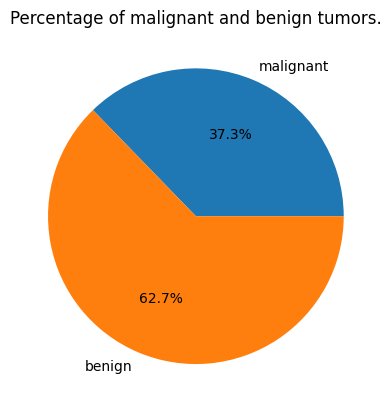

In [14]:
labels = ['malignant','benign']
sizes = [malignant,benign]
#fig,ax = plt.subplots(figsize=(6,3))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of malignant and benign tumors.')
plt.show()

# Correlation matrix

In [15]:
wdbc_df = wdbc_df.drop('ID', axis = 1)

In [16]:

wdbc_df['Diagnosis'] = wdbc_df['Diagnosis'].map({'B':0, 'M':1})
# Now, the 'diagnosis' column contains 0 for benign and 1 for malignant


In [17]:
# Calculate the correlation matrix
correlation_matrix = wdbc_df.corr()

In [18]:
correlation_matrix

,Diagnosis,radius-M,texture-M,perimeter-M,area-M,smoothness-M,compactness-M,concavity-M,concave_points-M,symmetry-M,...,radius-W,texture-W,perimeter-W,area-W,smoothness-W,compactness-W,concavity-W,concave_points-W,symmetry-W,fractal_dimension-W
Diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius-M,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture-M,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter-M,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area-M,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness-M,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness-M,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity-M,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points-M,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry-M,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


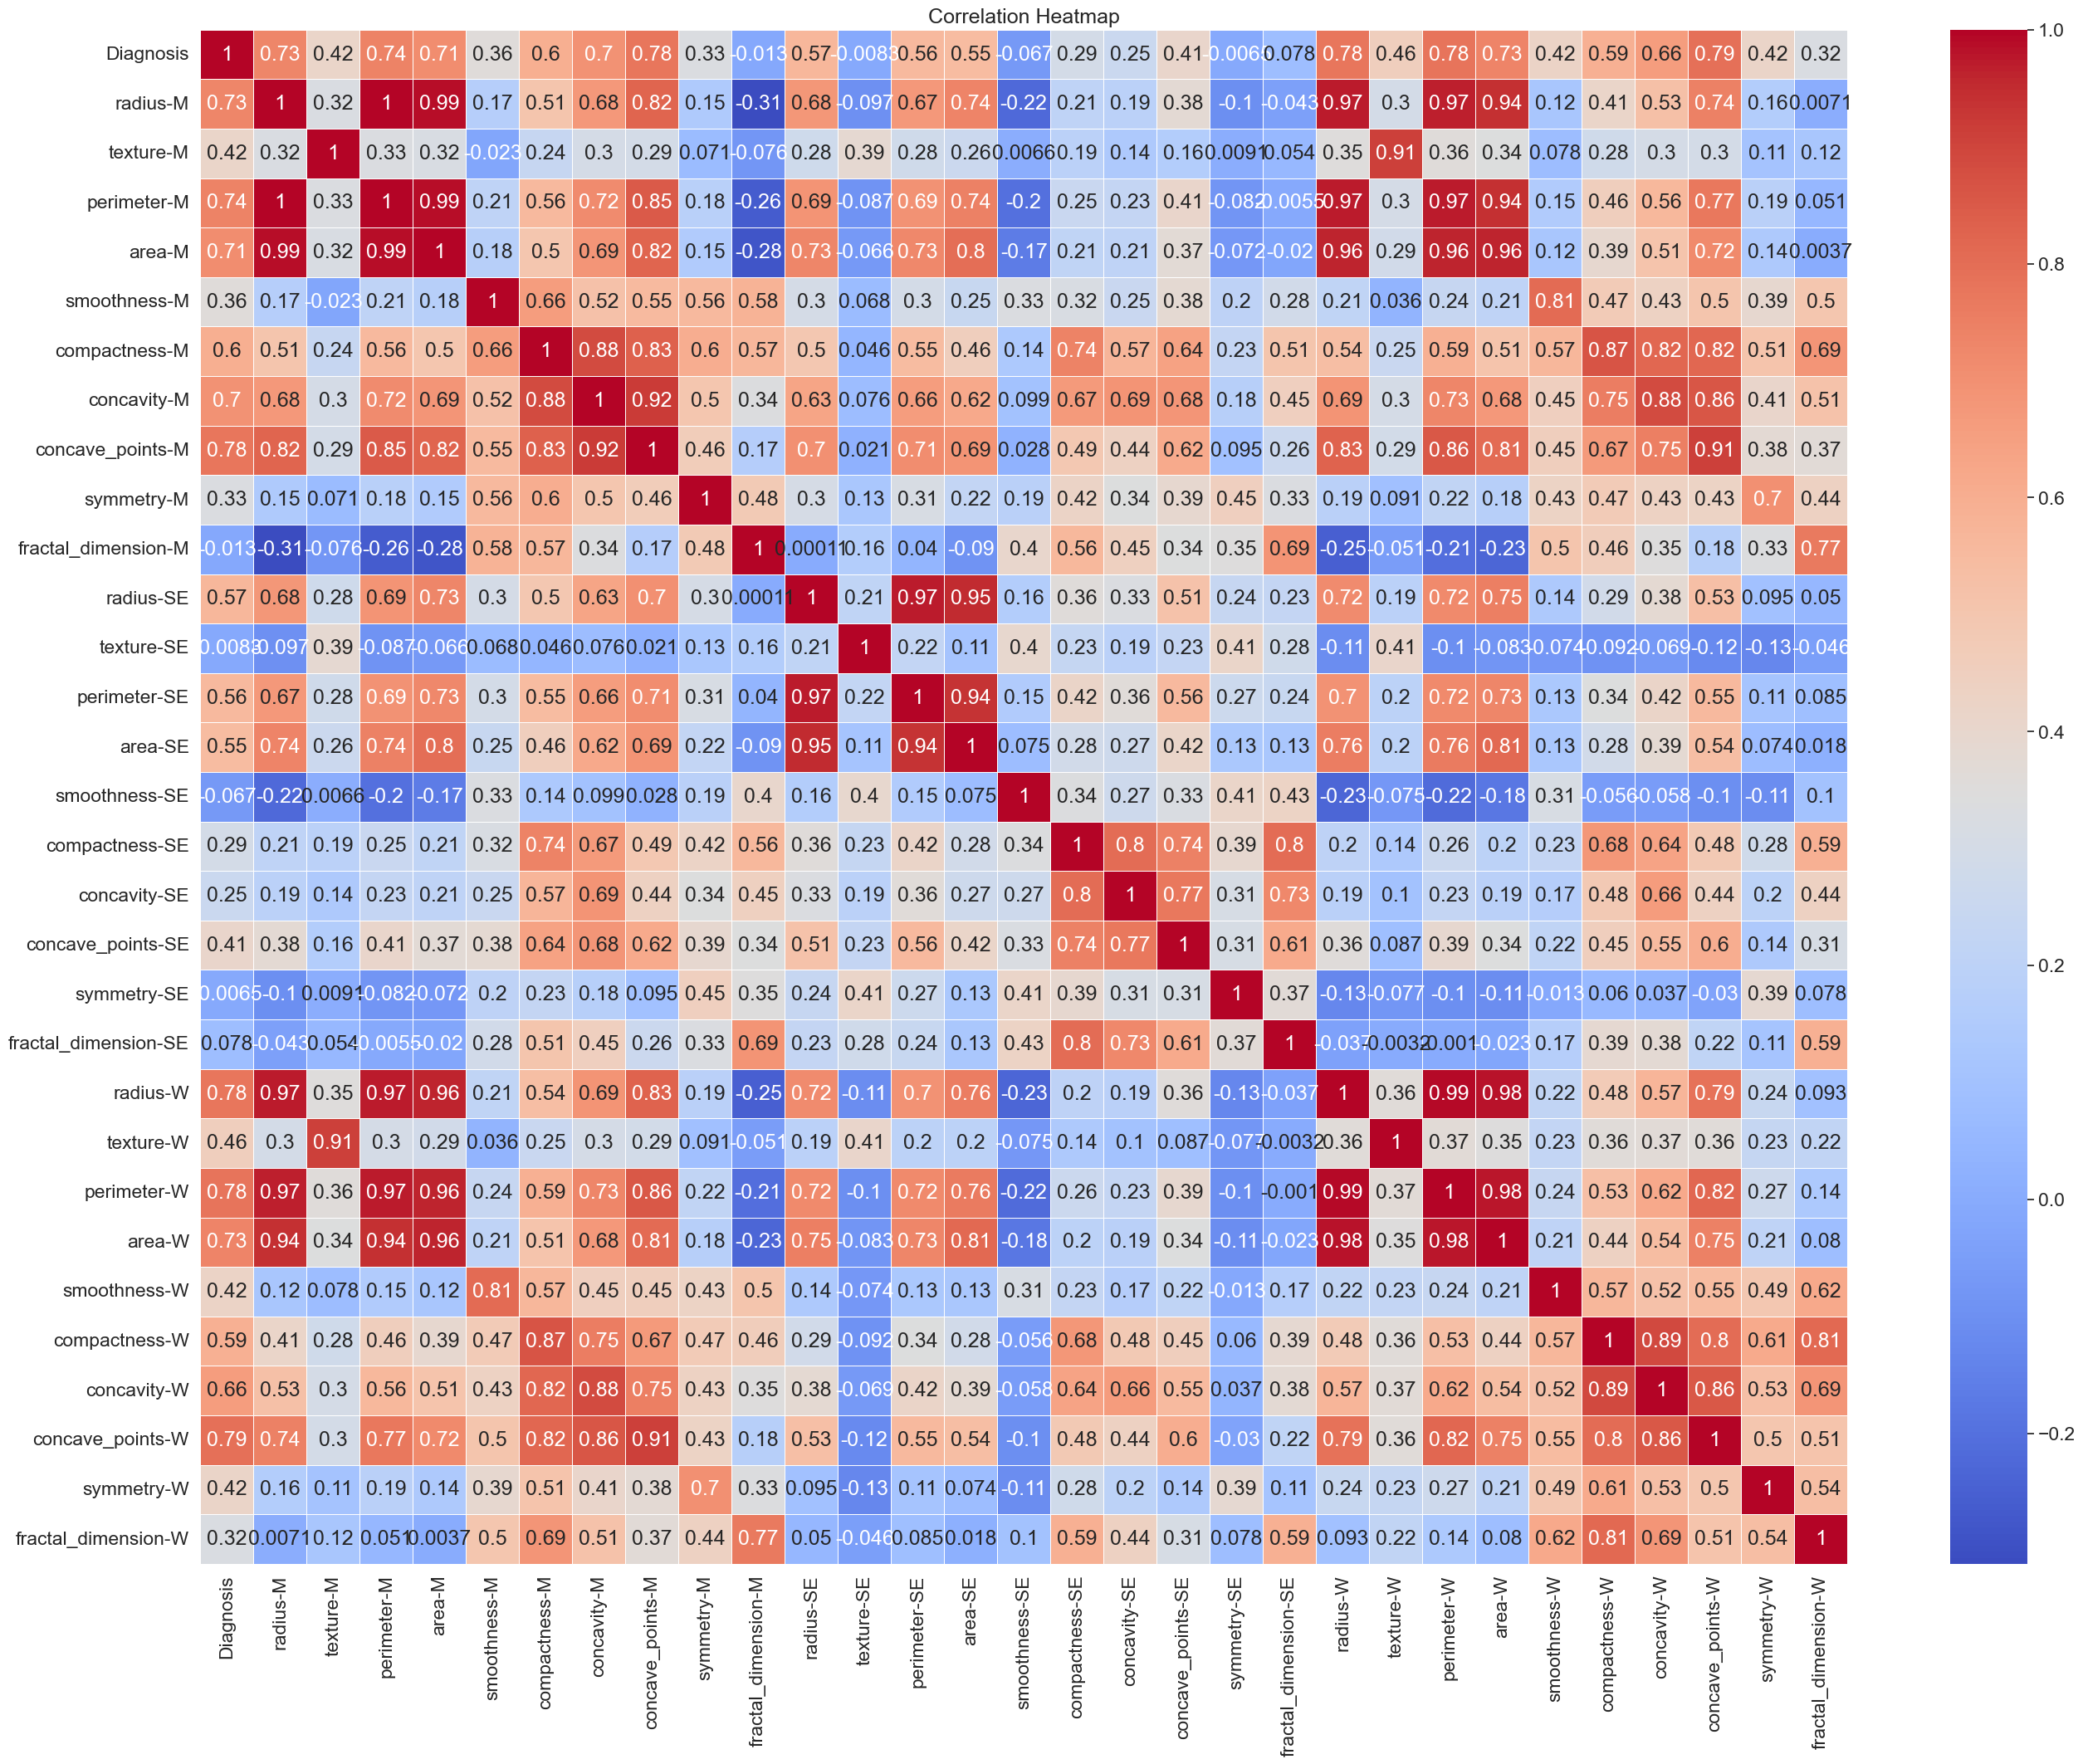

In [19]:
# Create the heatmap

plt.figure(figsize=(32,24))

sns.set(font_scale=1.5)  # Adjust the font scale if needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

plt.title('Correlation Heatmap')
  # Adjust the figure size if needed
plt.show()



In [20]:
wdbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diagnosis             569 non-null    int64  
 1   radius-M              569 non-null    float64
 2   texture-M             569 non-null    float64
 3   perimeter-M           569 non-null    float64
 4   area-M                569 non-null    float64
 5   smoothness-M          569 non-null    float64
 6   compactness-M         569 non-null    float64
 7   concavity-M           569 non-null    float64
 8   concave_points-M      569 non-null    float64
 9   symmetry-M            569 non-null    float64
 10  fractal_dimension-M   569 non-null    float64
 11  radius-SE             569 non-null    float64
 12  texture-SE            569 non-null    float64
 13  perimeter-SE          569 non-null    float64
 14  area-SE               569 non-null    float64
 15  smoothness-SE         5

## Split the data into features and target label

In [21]:

result = wdbc_df['Diagnosis']
features = wdbc_df.drop('Diagnosis',axis = 1)


In [22]:
result.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

In [23]:
features.head()

,radius-M,texture-M,perimeter-M,area-M,smoothness-M,compactness-M,concavity-M,concave_points-M,symmetry-M,fractal_dimension-M,...,radius-W,texture-W,perimeter-W,area-W,smoothness-W,compactness-W,concavity-W,concave_points-W,symmetry-W,fractal_dimension-W
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Machine learning models training and turning 

In [24]:
def train_predict(model, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    result = {}
    time_consum = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    model.fit(X_train, y_train)
    end = time() # Get end time
    
    # TODO: Calculate the training time
    time_consum['train_time'] = end - start
    
    
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    y_pred = model.predict(X_val)
    predictions_train = model.predict(X_train)
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    time_consum['pred_time'] = end - start
            
        
    # TODO: Compute accuracy on test set
    result['acc_test'] = accuracy_score(y_val,y_pred)
        
    result['pec_test'] = precision_score(y_val,y_pred)
    
    # TODO: Compute F-score on testing set which is y_test
    result['f_test'] = fbeta_score(y_val, y_pred, beta=0.5)
       
    # Success
    #print("{} model output.".format(model.__class__.__name__))
     
    # Return the results
    return result,time_consum

## Display the models performance by plotting the score into a side-by-side bar chart 

In [25]:
def evaluate(typeE, dictInfo):
    tyep_graph = typeE
    if tyep_graph == 1:
        
        item_names = list(time_consum.keys())
        item_values_train = [data['train_time'] for data in time_consum.values()]
        item_values_pred = [data['pred_time'] for data in time_consum.values()]

        # Create a bar chart
        plt.figure(figsize=(20, 15))  # Optional: Adjust figure size
        bars_train = plt.bar(item_names, item_values_train, label='Training Time', width=0.5, align='center')
        bars_pred = plt.bar(item_names, item_values_pred, label='Prediction Time', width=0.5, align='edge')

        # Add values on top of the training time bars
        for bar, value in zip(bars_train, item_values_train):
            plt.text(bar.get_x() + bar.get_width() / 2, value, str(round(value, 4)), ha='center', va='bottom',rotation=45)

        # Add values on top of the prediction time bars
        for bar, value in zip(bars_pred, item_values_pred):
            plt.text(bar.get_x() + bar.get_width() / 2, value, str(round(value, 4)), ha='center', va='bottom',rotation=45)

        # Add labels and title
        plt.xlabel('Machine learninng Models', fontsize=24)
        plt.ylabel('Time consuming(seconds)', fontsize=24)
        plt.title('Training and Prediction Times for Different Models',fontsize=24)
        plt.legend(loc='lower center', bbox_to_anchor=(1, 1)) 
        # Show the chart
        plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
        plt.tight_layout()  # Optional: Adjust layout for better spacing
        plt.show()
    else:
        item_names = list(results.keys())
        item_acc_score = [data['acc_test'] for data in results.values()]
        item_precision = [data['pec_test'] for data in results.values()]
        item_f_score = [data['f_test'] for data in results.values()]

        plt.figure(figsize=(20, 15)) 
        # Define the positions for each group of bars
        x = np.arange(len(item_names))

        # Set the width of each group of bars
        bar_width = 0.25

        # Create a bar chart
        bars_acc = plt.bar(x - bar_width, item_acc_score, label='Accuracy Score', width=bar_width, align='edge')
        bars_pec = plt.bar(x, item_precision, label='Precision Score', width=bar_width, align='edge')
        bars_fs = plt.bar(x + bar_width, item_f_score, label='F-score', width=bar_width, align='edge')

        # Add values on top of the bars
        for bars, values in [(bars_acc, item_acc_score), (bars_pec, item_precision), (bars_fs, item_f_score)]:
            for bar, value in zip(bars, values):
                plt.text(bar.get_x() + bar.get_width() / 2, value, str(round(value, 3)), ha='center', va='bottom', rotation=45)

        # Customize x-axis labels
        plt.xticks(x, item_names)

        # Add labels and title
        plt.xlabel('Machine learninng Models', fontsize=24)
        plt.ylabel('Score', fontsize=24)
        plt.title('Accuracy,Precision and Fbeta Score for Different Models', fontsize=24)
        plt.legend(loc='lower center', bbox_to_anchor=(1, 1)) 
        # Show the chart
        plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
        #plt.tight_layout()  # Optional: Adjust layout for better spacing
        plt.show()

        

## Splitting data 

In [26]:
X_train, X_temp, y_train, y_temp = train_test_split(features, 
                                                    result, 
                                                    test_size=0.3, 
                                                    random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, 
                                                y_temp, 
                                                test_size=0.5, 
                                                random_state=42)

## Standard scaling 

In [27]:
scaler = StandardScaler()
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
results = {}
time_consum = {}

# Create a Logistic Regression model
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier()
model4 = GaussianNB()
model5 = SVC(kernel='linear')


# Train the model on the training data

models = [model1,model2,model3,model4,model5]

for i in range (5):
    model_name = models[i].__class__.__name__
    results[model_name] = {}
    time_consum [model_name] = {}
    results[model_name],time_consum[model_name] = train_predict(models[i], X_train_scaled, y_train, X_test_scaled, y_test)


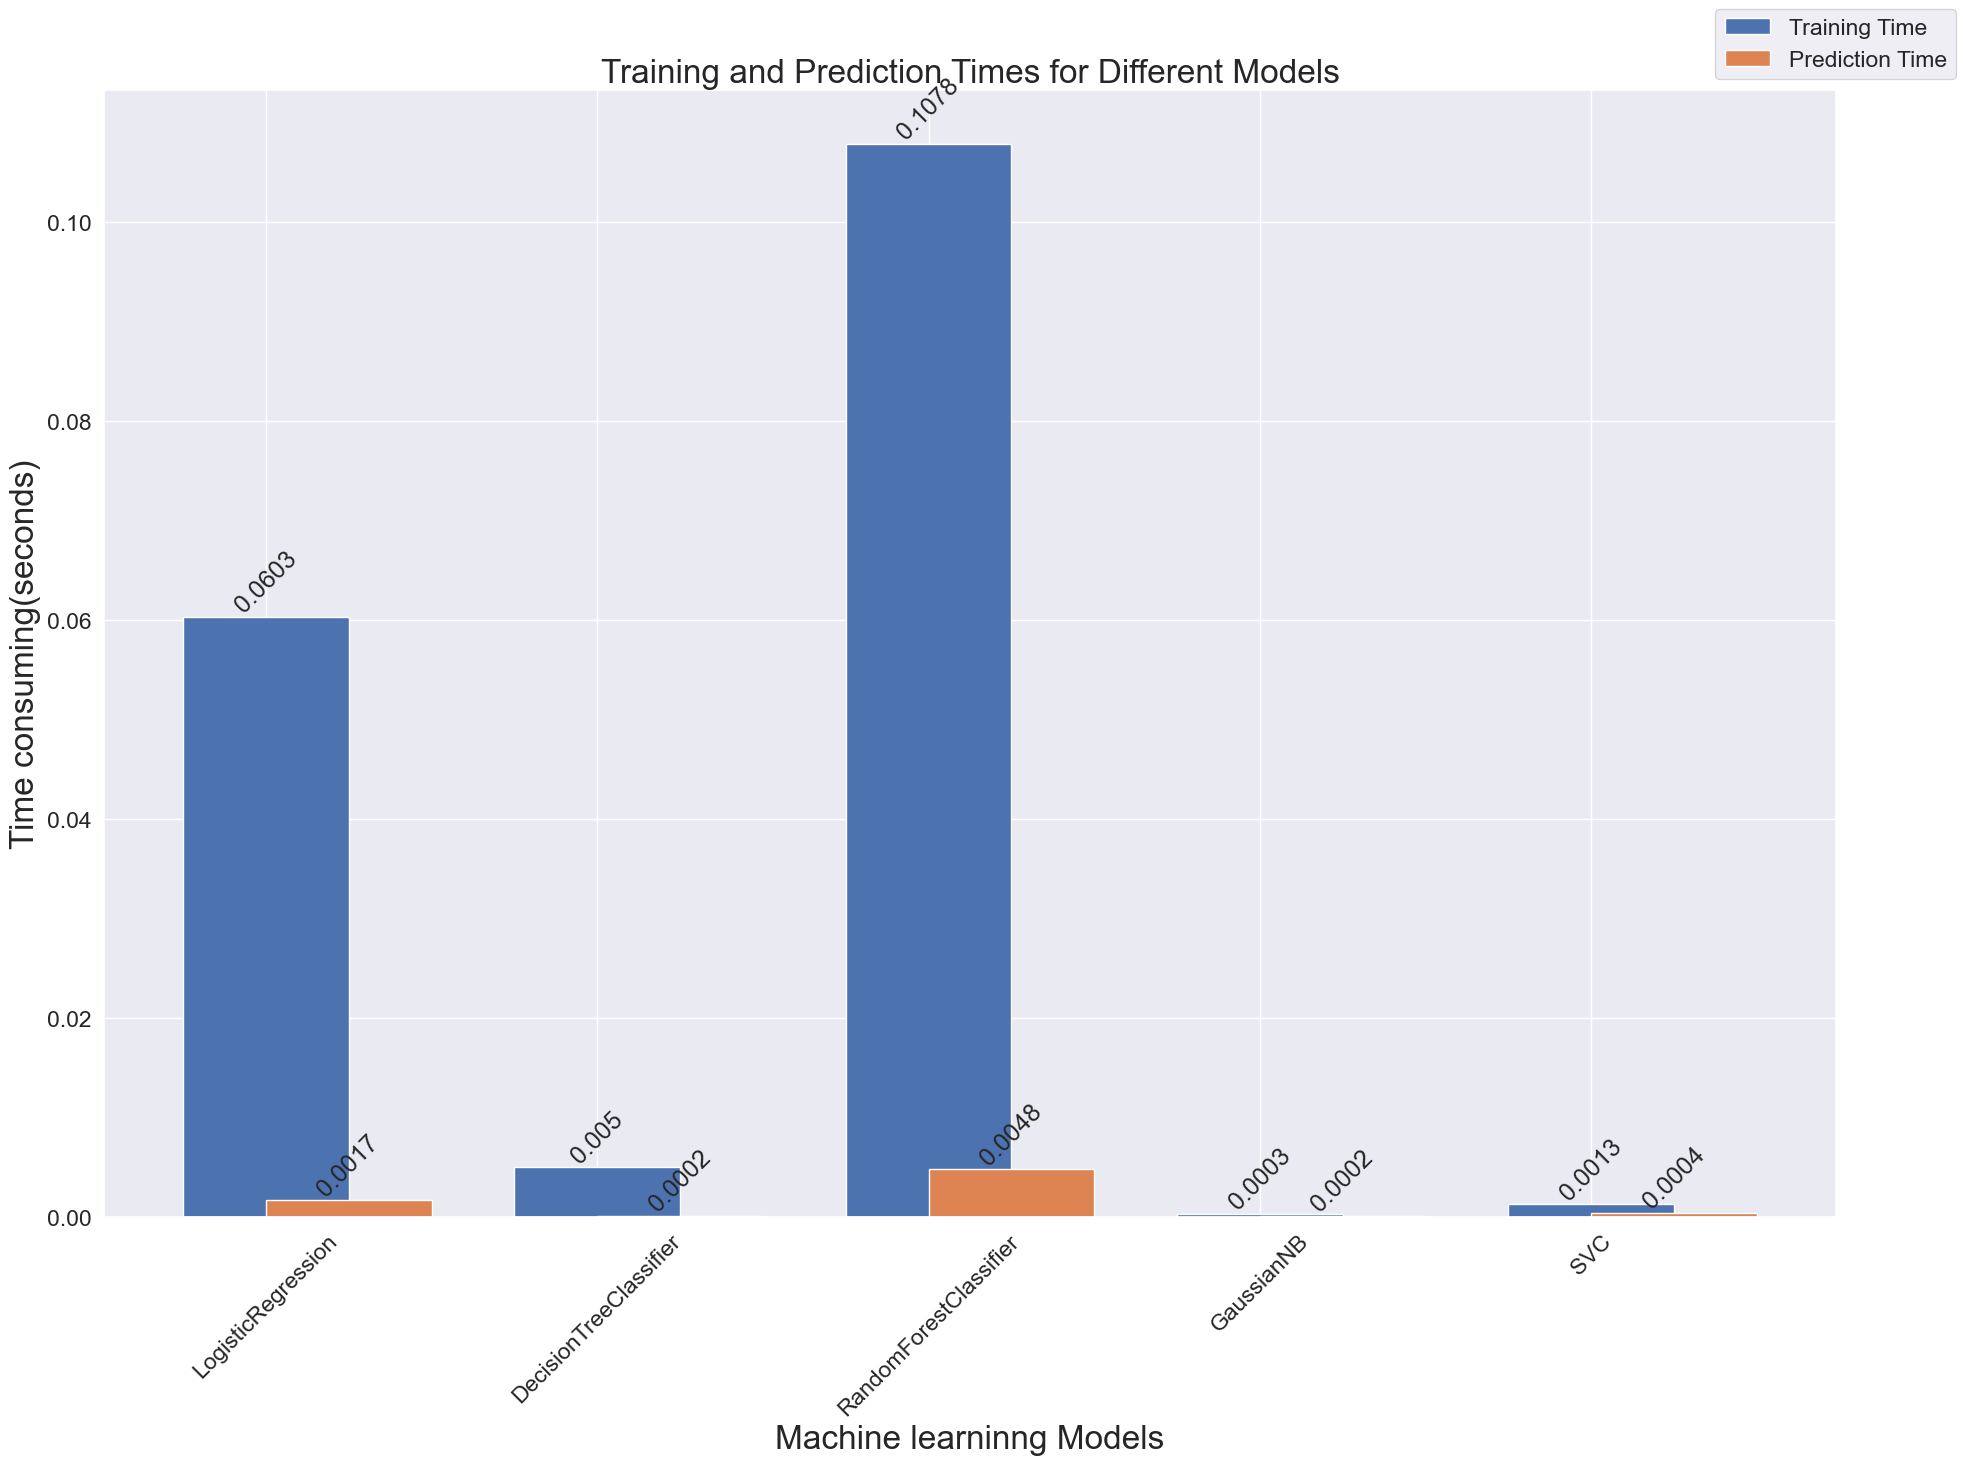

In [29]:
evaluate(1, time_consum)


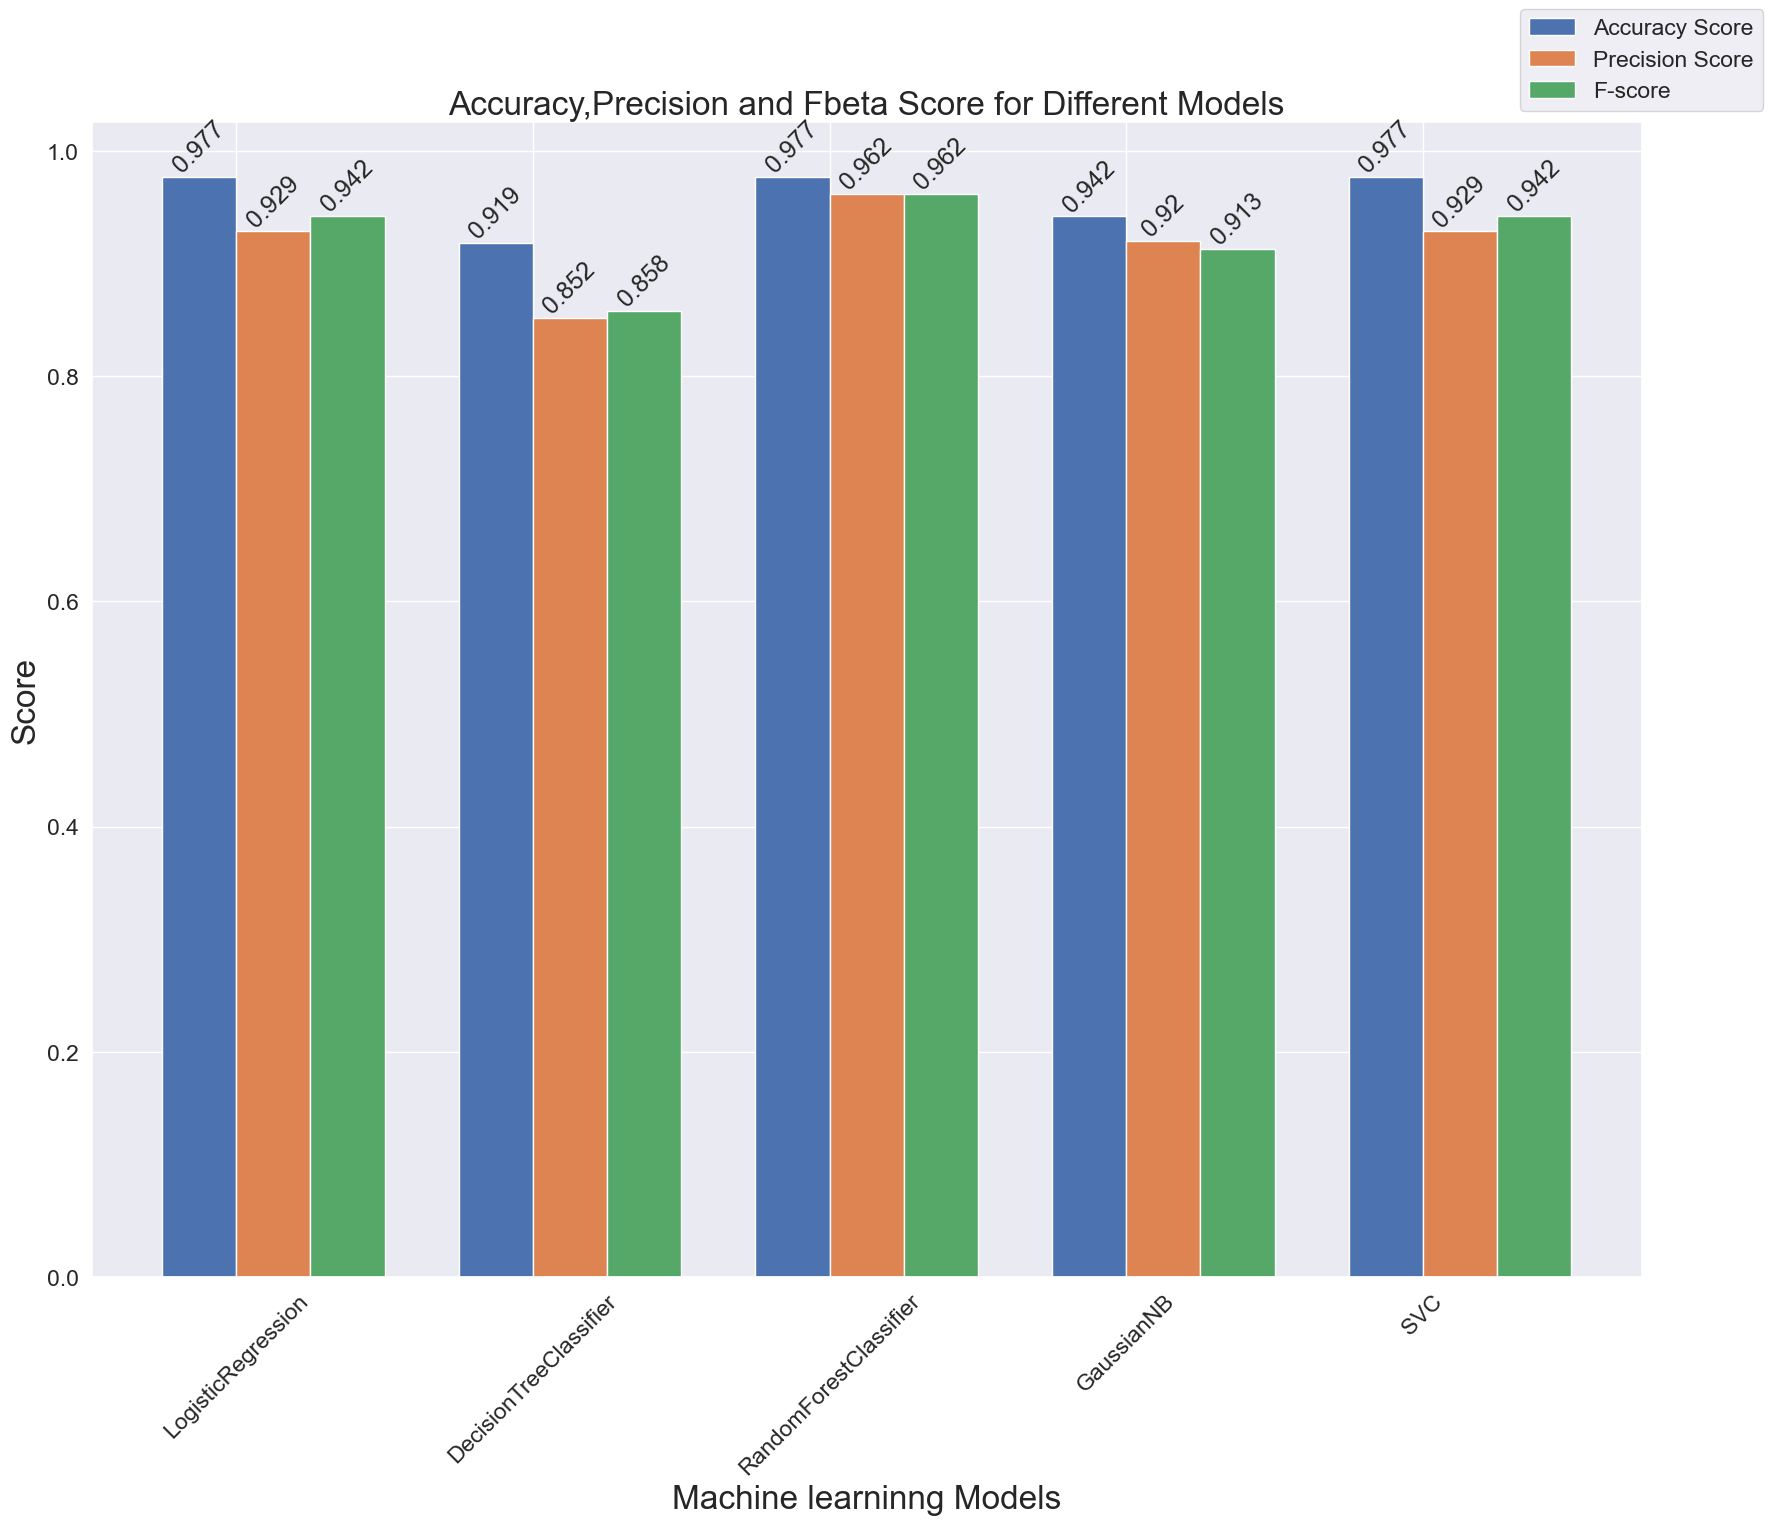

In [30]:
evaluate(2,results)

## Fine-turning modeling after selected. 

In [31]:
# def fine_turn(model,parameter):
    
#     clf = model

#     # TODO: Create the parameters list you wish to tune, using a dictionary if needed.
#     # HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
#     parameters = parameter

#     # TODO: Make an fbeta_score scoring object using make_scorer()
#     beta = 0.5
#     scorer = make_scorer(fbeta_score, beta=beta)

#     # TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
#     grid_obj = GridSearchCV(clf,parameters, scoring=scorer)

#     # TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
#     grid_fit = grid_obj.fit(X_train, y_train)

#     # Get the estimator
#     best_clf = grid_fit.best_estimator_

#     # Make predictions using the unoptimized and model
#     predictions = (clf.fit(X_train, y_train)).predict(X_val)
#     best_predictions = best_clf.predict(X_val)

#     # Report the before-and-afterscores
#     print("Score report for {} ".format(clf.__class__.__name__))
#     print("Unoptimized model\n------")
#     print("Accuracy score on Validation data: {:.4f}".format(accuracy_score(y_val, predictions)))
#     print("Precision score on Validation data: {:.4f}".format(precision_score(y_val, predictions)))
#     print("F-score on Validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5)))

#     print("\nOptimized Model\n------")
#     print("Final accuracy score on the Validation data: {:.4f}".format(accuracy_score(y_val, best_predictions)))
#     print("Final precision score on Validation data: {:.4f}".format(precision_score(y_val,best_predictions)))
#     print("Final F-score on the Validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5)))


In [32]:
# clf1 = LogisticRegression()
# parameters1 = {'penalty': ['l1', 'l2'],
#        'C': [0.001, 0.01, 0.1, 1, 10],
#        'solver': ['liblinear'],
#        'max_iter': [100, 200, 300]}

# clf2 = RandomForestClassifier()
# parameters2 = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 10, 20, 30],
#    'max_features': ['sqrt', 'log2', None],
# }


In [33]:
# fine_turn(clf1,parameters1)
# print('\n ============================================== \n')
# fine_turn(clf2,parameters2)

In [34]:
# def final_eval(model):
    
#     y_pred_test = model.predict(X_test)
   
#     Calculate test set metrics
#     test_accuracy = accuracy_score(y_test, y_pred_test)
#     test_precision = precision_score(y_test, y_pred_test)
#     test_f1 = fbeta_score(y_test, y_pred_test, beta=0.5)
    
#     Print test set metrics

#     print("\nFinal Evaluation with {} on Test Set:".format(model.__class__.__name__))
#     print(f"Test Accuracy: {test_accuracy:.4f}")
#     print(f"Test Precision: {test_precision:.4f}")
#     print(f"Test F1-Score: {test_f1:.4f}")

In [35]:
# for i in [clf1,clf2]:
#     final_eval(i)

## Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

 - Extract the feature importances using `'.feature_importances_'`.

In [36]:
def feature_plot(importances, X_train):
    
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Creat the plot
    fig = plt.figure(figsize = (16,10))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize = 20)
    plt.bar(np.arange(5), values, width = 0.4, align="center", color = '#00A000', \
          label = "Feature Weight")
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width = 0.2, align = "center", color = '#00A0A0', \
          label = "Cumulative Feature Weight")
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylim(0, 1)
    plt.ylabel("Weight", fontsize = 20)
    plt.xlabel("Feature", fontsize = 20)
    
    plt.legend(loc = 'upper center')
    plt.tight_layout()
    plt.show() 

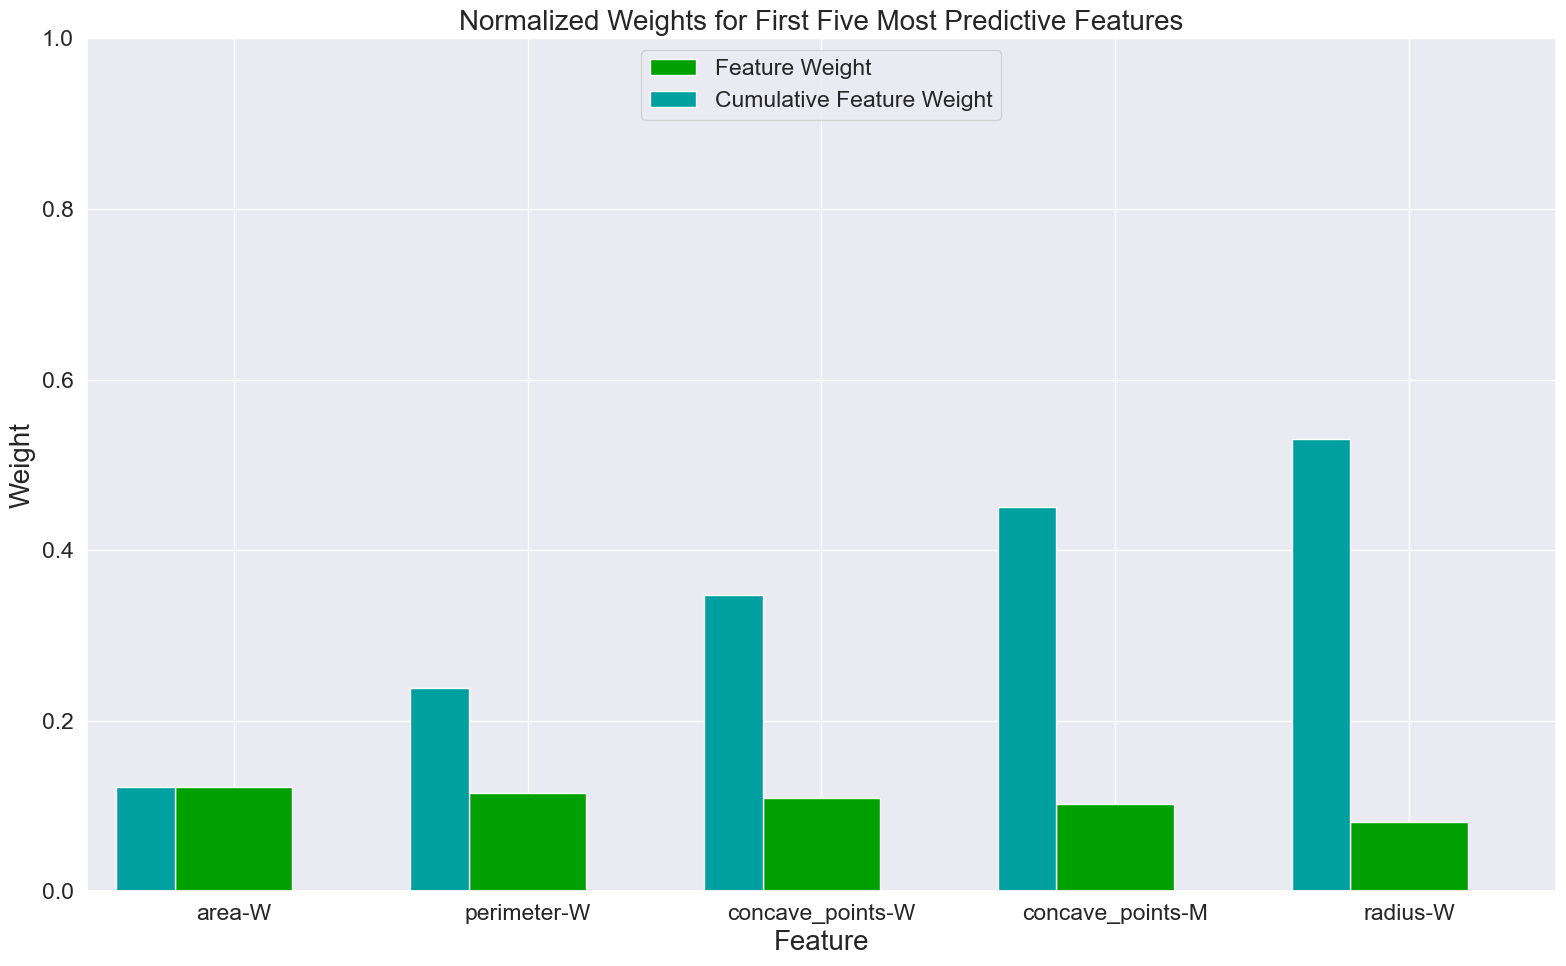

In [37]:
#RandomForestClassifier after fine turn 

# TODO: Extract the feature importances using .feature_importances_ 
importances2 = model3.feature_importances_

# Plot
feature_plot(importances2, X_train)

In [38]:
indices = np.argsort(importances2)[::-1]
columns = X_train.columns.values[indices[:5]]
values = importances2[indices][:5]
for i in range(len(columns)):
    print("Weight for {} is: {:.4f}".format(columns[i], values[i]))

Weight for area-W is: 0.1225
Weight for perimeter-W is: 0.1157
Weight for concave_points-W is: 0.1096
Weight for concave_points-M is: 0.1021
Weight for radius-W is: 0.0808


In [39]:
# Sort the feature importances in descending order
sorted_indices = np.argsort(importances2)[::-1]
sorted_importances = importances2[sorted_indices]

# Calculate the cumulative feature weight
cumulative_importance = np.cumsum(sorted_importances)

# Print the top 5 cumulative feature weights
print("Top 5 Cumulative Feature Weights:")
for i in range(5):
    feature_index = sorted_indices[i]
    feature_weight = cumulative_importance[i]
    print("Feature {}: {:.4f}".format(feature_index, feature_weight))


Top 5 Cumulative Feature Weights:
Feature 23: 0.1225
Feature 22: 0.2382
Feature 27: 0.3478
Feature 7: 0.4500
Feature 20: 0.5308


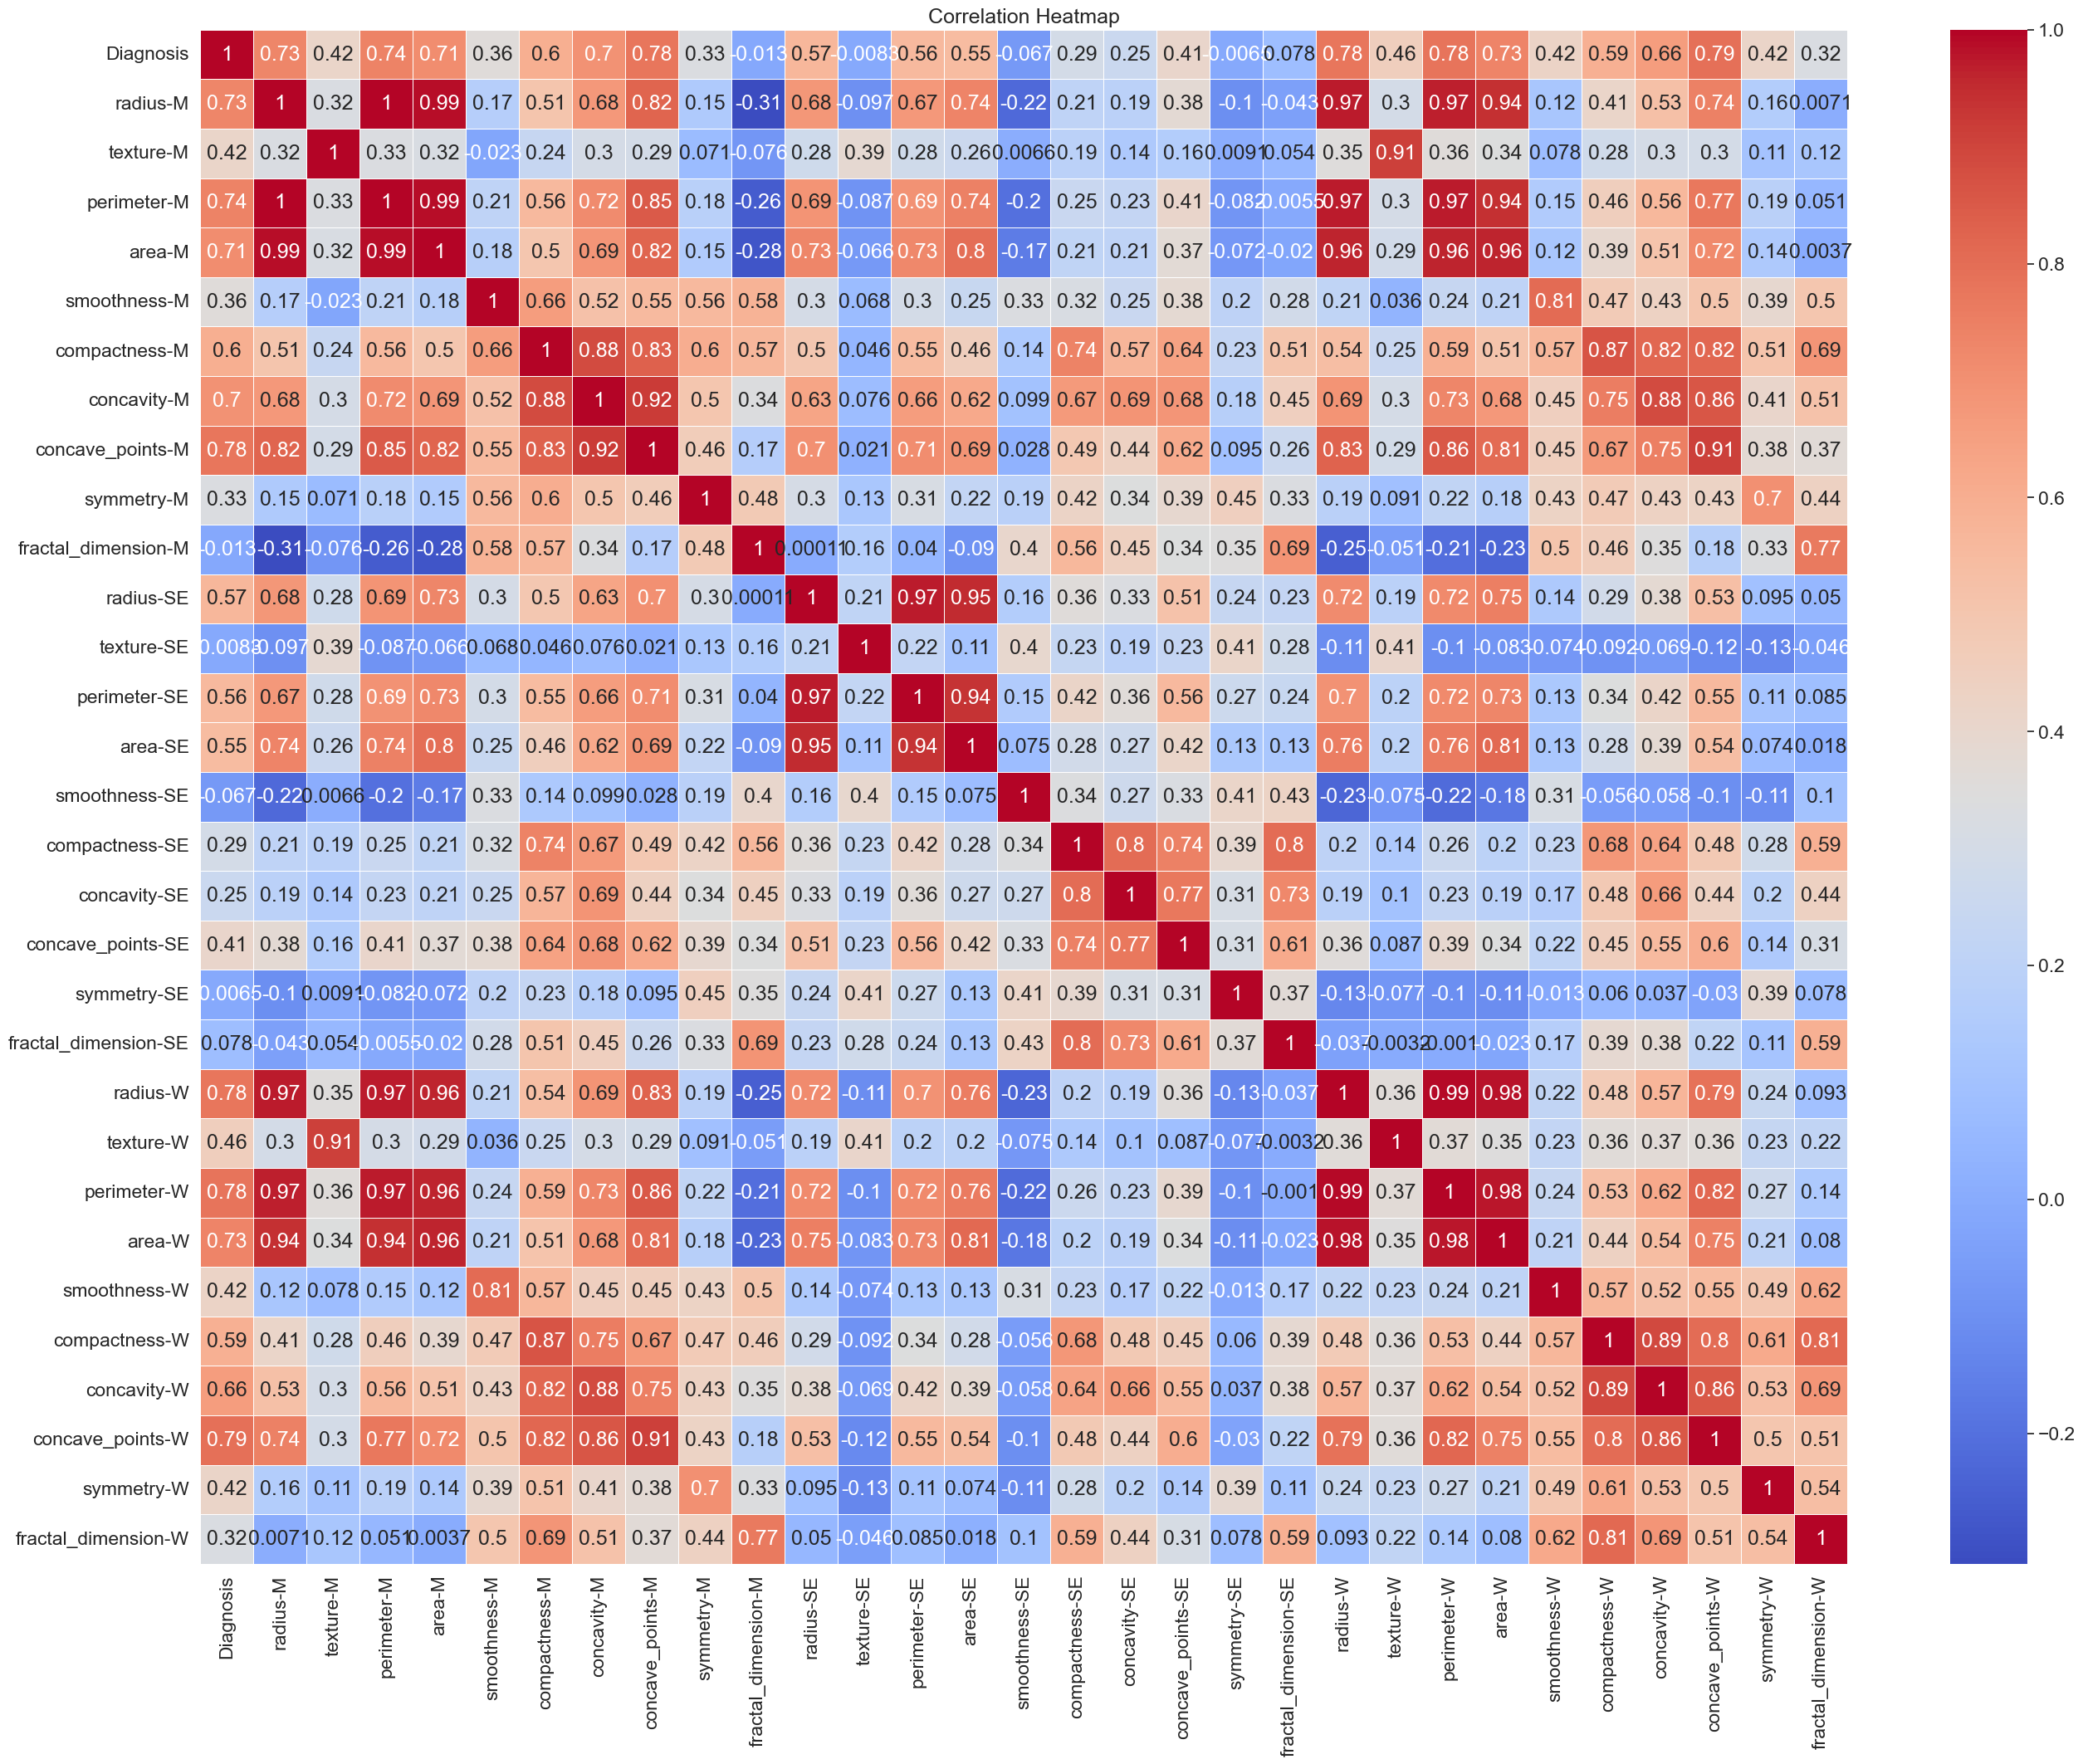

In [40]:
plt.figure(figsize=(32,24))

sns.set(font_scale=1.5)  # Adjust the font scale if needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=.5)

plt.title('Correlation Heatmap')
  # Adjust the figure size if needed
plt.show()

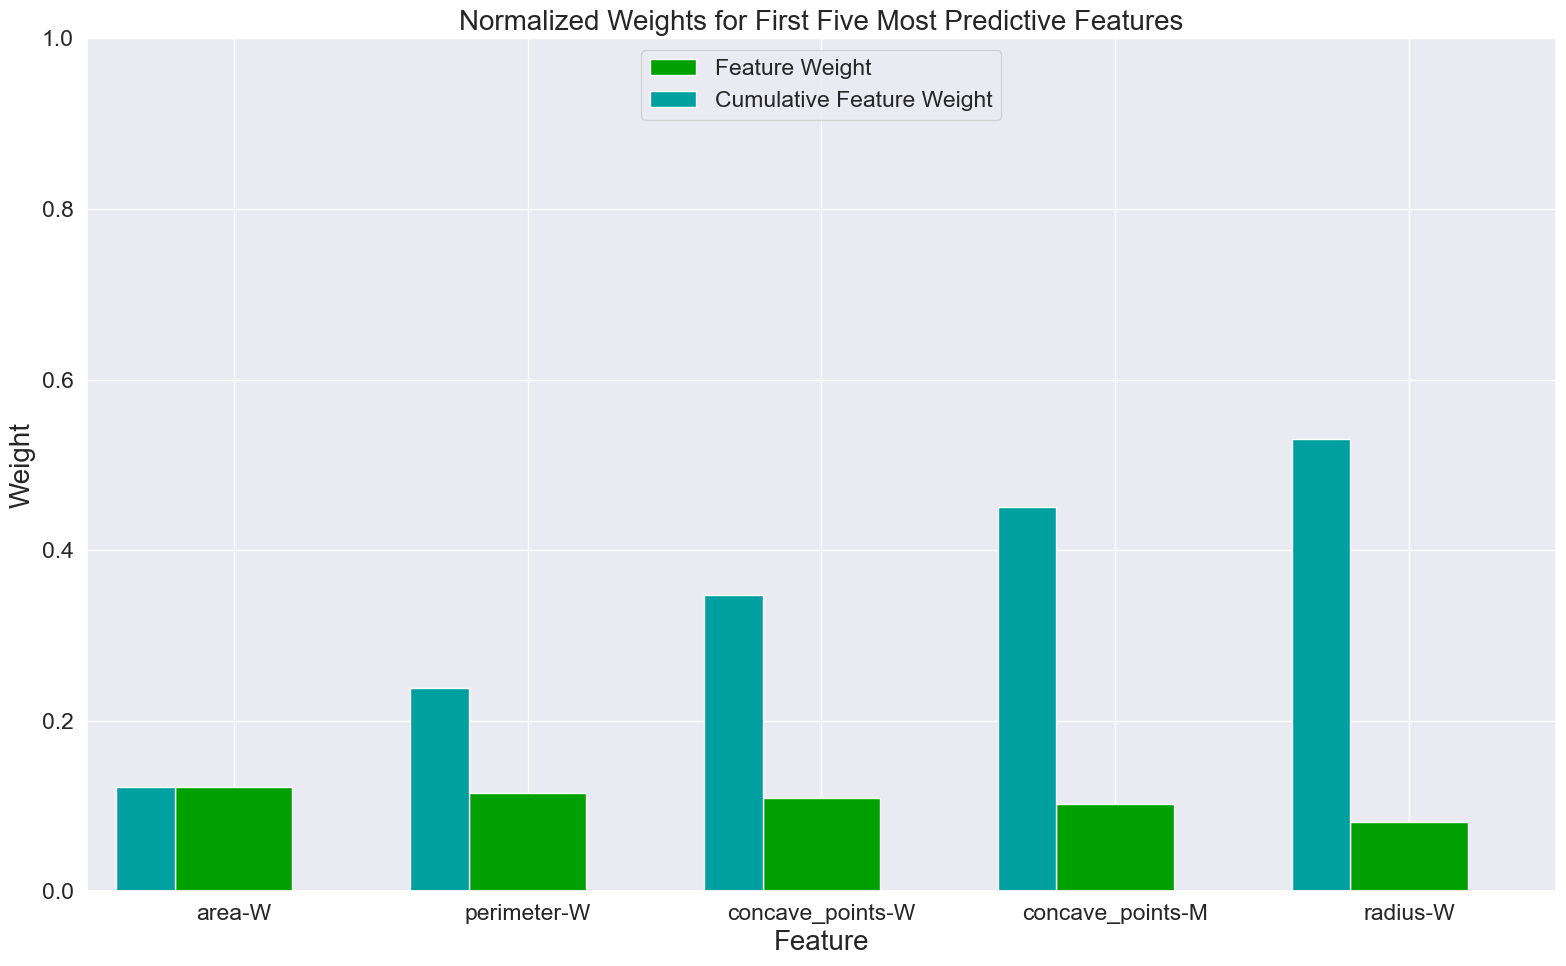

In [41]:
feature_plot(importances2, X_train)

## Conclusion: 

### With the results obtained from a high-performance model and the display of the correlation metric, we reject the null hypothesis. There is clear evidence that certain features in the breast cancer dataset are more important than others in predicting the malignancy of tumors. 